In [1]:
import matplotlib.pyplot as plt, json
import seaborn as sns, statistics
from figure_colors import named_colors

In [2]:
# read json
with open('inference_pathology_unet_gpu_vram.json') as f:
    unet_results = json.load(f)
with open('inference_pathology_oct_gpu_vram.json') as f:
    oct_results = json.load(f)
with open('inference_pathology_m3d_gpu_vram.json') as f:
    m3d_results = json.load(f)
with open('test_segformer.json') as f:
    vit_results = json.load(f)
with open('test_transunet.json') as f:
    transunet_results = json.load(f)

oct_results = {int(k): v for k, v in oct_results.items()}
unet_results = {int(k): v for k, v in unet_results.items()}
vit_results = {int(k): v for k, v in vit_results.items()}
transunet_results = {int(k): v for k, v in transunet_results.items()}
m3d_results = {int(k): v for k, v in m3d_results.items()}

In [3]:
def mebibytes_to_megabytes(mb):
    byte = 1024 * 1024 * mb
    return byte / 1_000_000
def mebibytes_to_gigabytes(mb):
    byte = 1024 * 1024 * mb
    return byte / 1_000_000_000
def ones_to_millions(ones):
    return ones / 1_000_000
mebibytes_to_megabytes(1)

1.048576

In [4]:
oct_results = {ones_to_millions(k): mebibytes_to_gigabytes(statistics.mean(v)) for k, v in oct_results.items()}
unet_results = {ones_to_millions(k): mebibytes_to_gigabytes(statistics.mean(v)) for k, v in unet_results.items()}
vit_results = {ones_to_millions(k): mebibytes_to_gigabytes(statistics.mean(v)) for k, v in vit_results.items()}
transunet_results = {ones_to_millions(k): mebibytes_to_gigabytes(statistics.mean(v)) for k, v in transunet_results.items()}
m3d_results = {ones_to_millions(k): mebibytes_to_gigabytes(statistics.mean(v)) for k, v in m3d_results.items()}

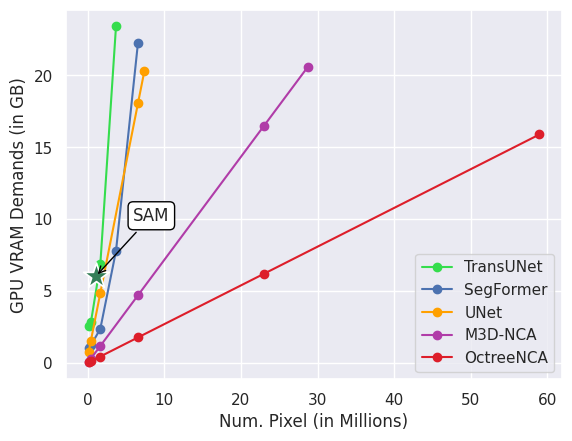

In [11]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots()
plt.plot(transunet_results.keys(), transunet_results.values(), label='TransUNet', marker='o', color=named_colors['TransUNet'])
plt.plot(vit_results.keys(), vit_results.values(), label='SegFormer', marker='o')
plt.plot(unet_results.keys(), unet_results.values(), label='UNet', marker='o', color=named_colors['UNet'])
plt.plot(m3d_results.keys(), m3d_results.values(), label='M3D-NCA', marker='o', color=named_colors['M3D-NCA'])
plt.plot(oct_results.keys(), oct_results.values(), label='OctreeNCA', marker='o', color=named_colors['OctreeNCA'])
plt.xlabel("Num. Pixel (in Millions)")
plt.ylabel("GPU VRAM Demands (in GB)")
ax.ticklabel_format(useOffset=False)
scatter = ax.scatter(ones_to_millions(1024**2), mebibytes_to_gigabytes(5739.20), color=named_colors["SAM"], marker='*', s=375, edgecolor='white', linewidth=1.25)
ax.annotate('SAM', (ones_to_millions(1024**2), mebibytes_to_gigabytes(5739.20)), textcoords="offset points", xytext=(40,40), ha='center',
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"),
        arrowprops=dict(arrowstyle="->", color='black'))
scatter.zorder = 2
plt.legend(loc="lower right")

plt.savefig('figures/gpu_vram.pdf', bbox_inches='tight')